## Financial Data and Preprocessing

### Getting data from Yahoo Finance

In [1]:
# Import library
!pip install yfinance

In [2]:
!pip install pandas==1.3.0

In [3]:
import pandas as pd
import yfinance as yf

In [4]:
# Download the Apple stock data

df_yahoo = yf.download('AAPL',
                      start='2000-01-01',
                      end='2010-12-31',
                      progress=False,
                      on_bad_lines=None)  #disable the progress bar

In [5]:
# Inspect the data
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')
df_yahoo.head(10)

Downloaded 2766 rows of data.


Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.851942   535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.780115   512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.791531   778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.723033   767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.757282   460734400
2000-01-10  0.910714  0.912946  0.845982  0.872768   0.743963   505064000
2000-01-11  0.856585  0.887277  0.808036  0.828125   0.705908   441548800
2000-01-12  0.848214  0.852679  0.772321  0.778460   0.663573   976068800
2000-01-13  0.843610  0.881696  0.825893  0.863839   0.736352  1032684800
2000-01-14  0.892857  0.912946  0.887277  0.896763   0.764417   390376000

### Getting Data From Quandl

In [6]:
# Import the library
!pip install Quandl

In [7]:
import pandas as pd
import quandl

In [8]:
# Authenticate using the personal API key from Quandl
QUANDL_KEY = 'bT7EaEjy1f8-bwJTGf67'
quandl.ApiConfig.api_key = QUANDL_KEY

In [9]:
# Download the data
df_quandl = quandl.get(dataset='WIKI/AAPL',
                      start_date='2000-01-01', 
                      end_date='2010-12-31')

In [10]:
# Inspect the data
print(f'Downloaded {df_quandl.shape[0]} rows of data.')
df_quandl.head()

Downloaded 2767 rows of data.


Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                 
2000-01-03  104.87  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.25  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.75  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.12  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.50  101.00   95.50   99.50  4113700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2000-01-03          1.0   3.369314   3.614454  3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053  3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125  3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748  3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977  3.068270    3.196784   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0

### Converting Prices to Returns

In [11]:
# Import the libraries
import pandas as pd
import numpy as np 
import yfinance as yf

In [12]:
# Download the data and keep the adjusted closes prices only
df = yf.download('AAPL',
                 start='2000-01-01',
                 end='2010-12-31',
                 progress=False)

df = df.loc[:,['Adj Close']] #to load the specific data and save as df
df.rename(columns={'Adj Close':'adj_close'},inplace=True)

In [13]:
# Convert adjusted prices to simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()  #calculate the percentage between currents & perrier elements
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [14]:
# Inspect the output
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.851942         NaN       NaN
2000-01-04   0.780115   -0.084310 -0.088077
2000-01-05   0.791531    0.014634  0.014527
2000-01-06   0.723033   -0.086539 -0.090514
2000-01-07   0.757282    0.047369  0.046282

In [15]:
# To calculate the Consumer Price Index
# Import libraries
import pandas as pd
import quandl

QUANDL_KEY = 'bT7EaEjy1f8-bwJTGf67'
quandl.ApiConfig.api_key = QUANDL_KEY

In [16]:
# Create a dataframe with all the possible dates and lest join the prices on it
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31',
                                               end='2010-12-31'))

df = df_all_dates.join(df[['adj_close']],how='left')\
.fillna(method='ffill')\
.asfreq('M')

In [17]:
# Download the inflation data from Quandl
df_cpi = quandl.get(dataset='RATEINF/CPI_USA',
                   start_date='1999-12-01',
                   end_date='2010-12-31')

df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

In [18]:
# Merge inflation data to prices
df_merged = df.join(df_cpi, how='left') 

In [19]:
# Calculate simple returns and inflation rate
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

In [20]:
# Adjust returns for inflation
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate - 1) -1
df_merged.head(10)

adj_close    cpi  simple_rtn  inflation_rate  real_rtn
1999-12-31        NaN  168.3         NaN             NaN       NaN
2000-01-31   0.789628  168.8         NaN        0.002971       NaN
2000-02-29   0.872397  169.8    0.104820        0.005924 -2.111404
2000-03-31   1.033652  171.2    0.184842        0.008245 -2.194692
2000-04-30   0.944224  171.3   -0.086517        0.000584 -1.914017
2000-05-31   0.639313  171.5   -0.322922        0.001168 -1.677869
2000-06-30   0.797239  172.4    0.247024        0.005248 -2.253603
2000-07-31   0.773455  172.8   -0.029833        0.002320 -1.972423
2000-08-31   0.927576  172.8    0.199262        0.000000 -2.199262
2000-09-30   0.391960  173.7   -0.577437        0.005208 -1.424776

### Changing Frequency

In [21]:
# Obtain the simple returns in case of starting in this recipe
import pandas as pd
import numpy as np
import yfinance as yf

In [22]:
# Download the data
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                auto_adjust=False,
                progress=False)

# Keep only the adjusted close price
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

# Calculate the simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# Remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head(10)

log_rtn
Date                
2000-01-04 -0.088077
2000-01-05  0.014527
2000-01-06 -0.090514
2000-01-07  0.046281
2000-01-10 -0.017744
2000-01-11 -0.052506
2000-01-12 -0.061847
2000-01-13  0.104069
2000-01-14  0.037405
2000-01-18  0.034254

In [23]:
# Import libraries
import pandas as pd

In [24]:
# Define the function for calculating the realized volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [25]:
# Calculate the monthly realized volatility
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

In [26]:
# Annualize the value
df_rv.rv = df_rv.rv*np.sqrt(12)

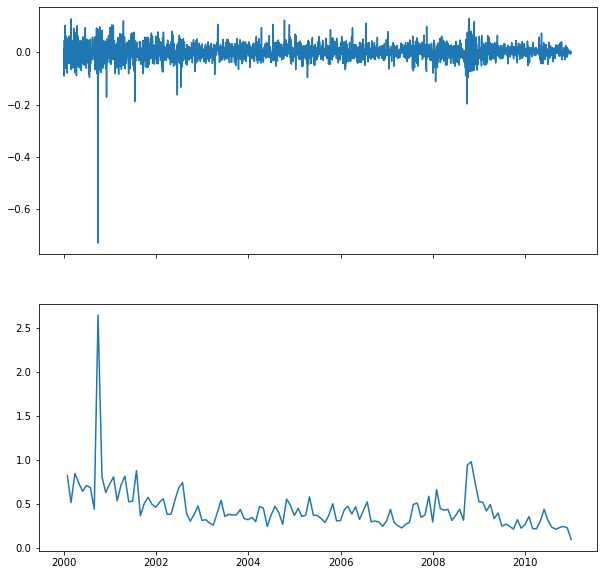

In [27]:
# Plot the result
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()

### Visualizing Time Series Data

In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [29]:
# Import the libraries
import pandas as pd
import yfinance as yf

# Download data as Pandas dataframe
df = yf.download('MSFT', auto_adjust=False, progress=False)
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

# Create simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# Dropping NA's in the first row
df.dropna(how = 'any', inplace=True)


#### The <code>plot</code> method of pandas

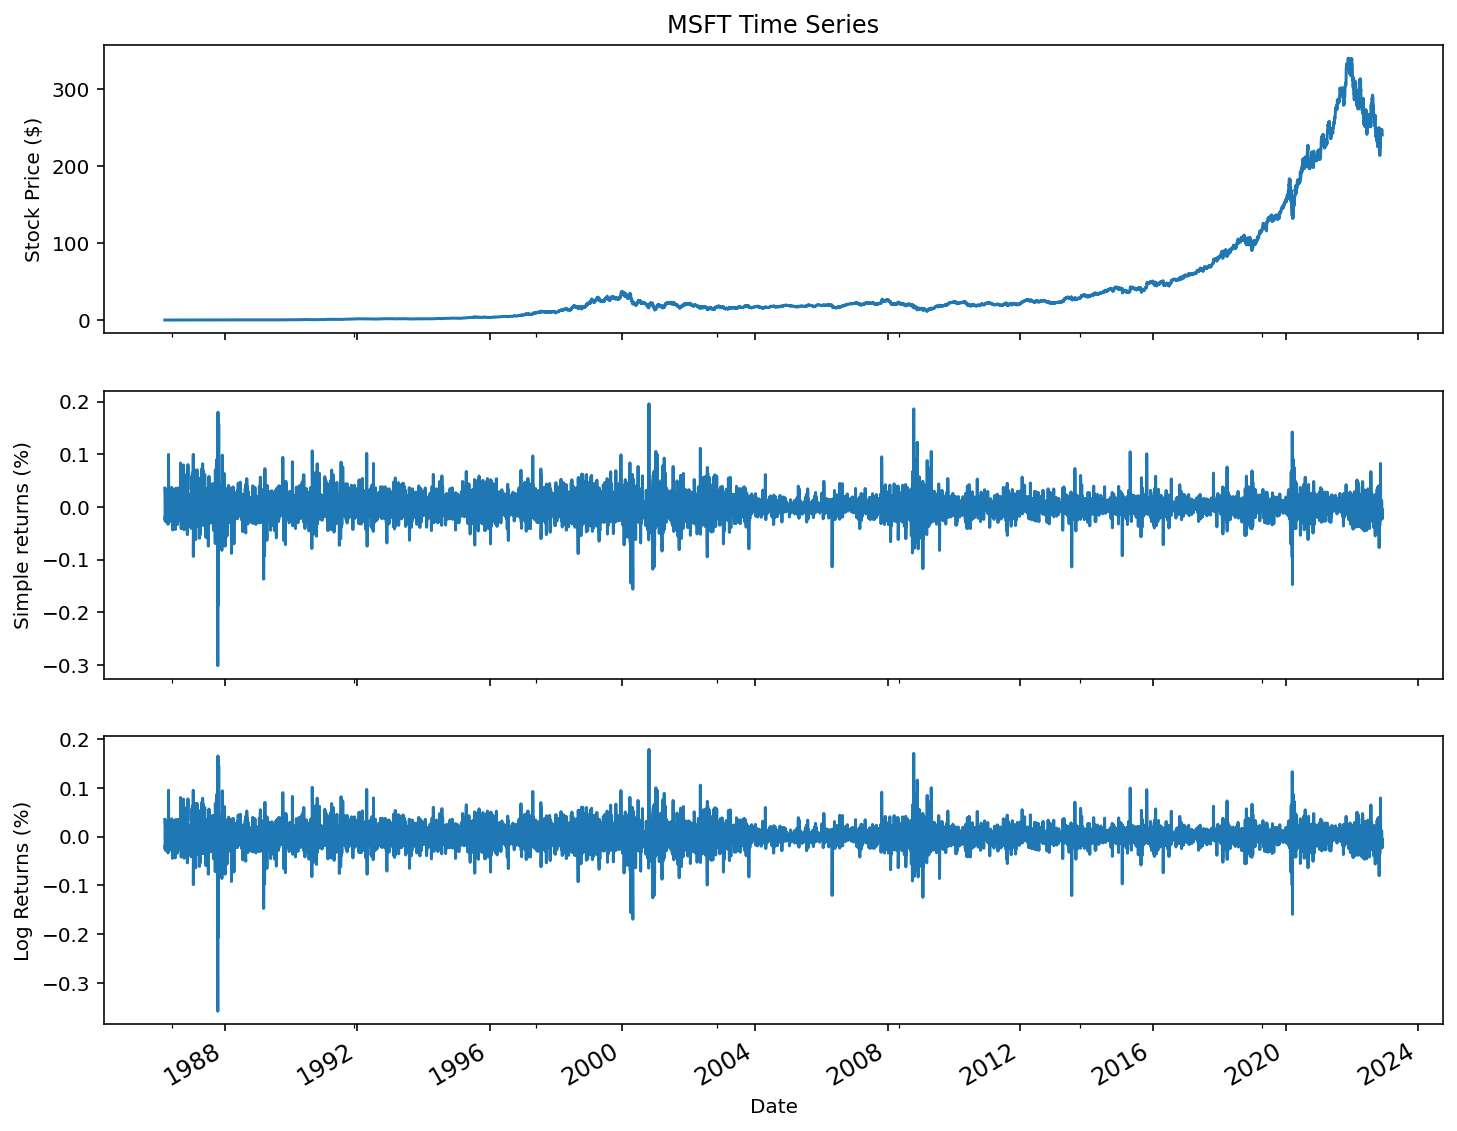

In [30]:
fig,ax = plt.subplots(3, 1, figsize=(12,10), sharex=True)

# Add  prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT Time Series',
         ylabel = 'Stock Price ($)')

# Add Simple Returns
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# Add Log Returns
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date',
         ylabel = 'Log Returns (%)')

ax[2].tick_params(axis='x',
                 which='major',
                 labelsize=12)

# plt.tight_layout()
plt.show()

#### <code>plotly</code> + <code>cufflinks</code>

In [31]:
# Import the libraries and handle the settings
!pip install cufflinks

In [32]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# Set up settings(run it once)
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Initialize notebook dispay
init_notebook_mode()

In [33]:
# Create the plots
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT Time Series')

* The plot method of pandas:
    * plt.subplots(3,1) -> Three plots vertically
    * figsize -> Specify the figure size
    * set -> Specify the title and axis labels on each of plots
 
* Plotly and cufflinks:
    * subplots=True -> Create the previous plot
    * shape=(3,1) -> Specify the shape of the figure
    * shared_xaxes=True -> Indicate that the plots share the x-axis
    * title='MSFT Time Series' -> Add the title
    * kind='line -> By defaut, theselected type of plot is line chart
    * nbviewer -> Use it for show the plot when using plotly
    
    * cf.set_config_file(world_readable=True, theme='pearl', offline=True) -> Configuration
   
* List of some of the libraries to create plots:
    * matplotlib
    * seaborn
    * plotly
    * plotly_express
    * altair
    * plotnine

### Identifying Outliers

While working with any data, we often encounter observation that are significantly different from the majority to see outliers. Many ML algorithms and statistical approaches be influenced by outliers, leading to incorrect result. This is why we should handle the outliers before creating any models.

In [34]:
# Reapeat the steps from Converting Prices to Returns
import pandas as pd
import yfinance as yf

In [35]:
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                progress=False)
df=df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [36]:
# Convert adjusted prices to simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()  #calculate the percentage between currents & perrier elements
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df.head(10)

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.851942         NaN       NaN
2000-01-04   0.780115   -0.084310 -0.088078
2000-01-05   0.791530    0.014633  0.014527
2000-01-06   0.723033   -0.086538 -0.090514
2000-01-07   0.757282    0.047369  0.046281
2000-01-10   0.743963   -0.017588 -0.017744
2000-01-11   0.705909   -0.051151 -0.052506
2000-01-12   0.663573   -0.059973 -0.061847
2000-01-13   0.736352    0.109677  0.104069
2000-01-14   0.764417    0.038114  0.037405

In [37]:
# Calculate the rolling mean and standard deviation
# Using rolling method fro, pandas to specify the window size and administrators would like to calculate
df_rolling = df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [38]:
# Join the rolling metrics to the original data
df_outliers = df.join(df_rolling)

In [39]:
# Define the function for detecting outliers
def identify_outliers(row,n_sigmas=3):
    '''
    Function for identifying the outliers using the 3 sigma rule.
    The row must contain the folloing columns/indices: simple_rtn, mean, std.
    
    Paramaeters
    -----------
    row : pd.Series
    A row of a pd.DataFrame, over which the function can be applied.
    n_sigmas : int
    The number of standard deviations above/below the mean = used for detecting outliers
    
    Returns
    -------
    0/1 ; int
    An integer with 1 indicating an outliers and 0 vise versa.
    '''
    x=row['simple_rtn']
    mu=row['mean']
    sigma=row['std']
    
    if (x > mu + 3 * sigma) | (x < mu -3 * sigma):
        return 1
    else:
        return 0

In [40]:
# Identify the outliers and extract their values for later use
df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier']== 1, ['simple_rtn']]


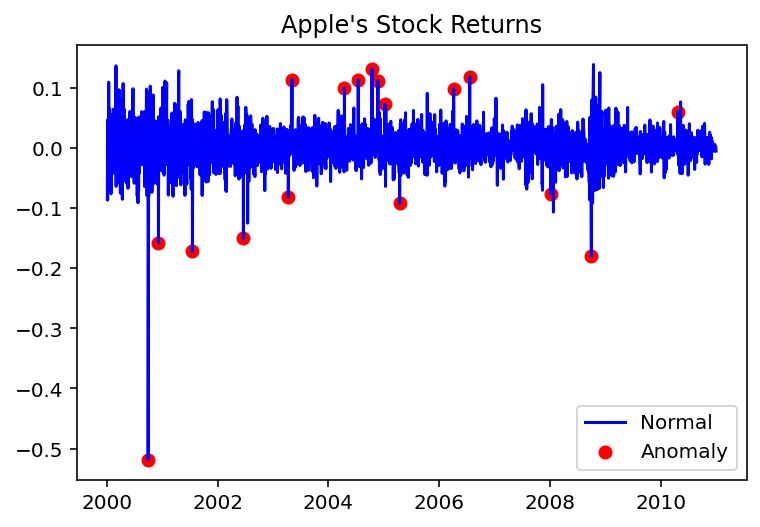

In [41]:
# Plot the results
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn,
       color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn,
           color='red', label='Anomaly')
ax.set_title("Apple's Stock Returns")
ax.legend(loc='lower right')

# plt.tight_layout()
plt.show()

### Investigating Stylized Facts of Asset Returns

It is important to be awre of stylized facts because we are building materials that are supposed to present asset price dynamics, the models must be able to capture or replicate the properties in the following recipe. we investigate the five stylized facts using the example of daily S&P 500 returns from the year 1985 to 2018.

In [42]:
# Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [43]:
# Download the S&P 500 data from yfinance and calculate the returns
df = yf.download('^GSPC',
              start='1985-01-01',
              end='2018-12-31',
              progress=False)
df = df[['Adj Close']].rename(columns={'Adj Close':'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')

Fact 1- Non-Gaussian distribution of returns

1. Calculate the Normal Probability Density Function (PDF) using the mean and standard deviation

In [44]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

2. Plot the histogram and Q-Q plot

C:\Users\mhdkh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\mhdkh\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



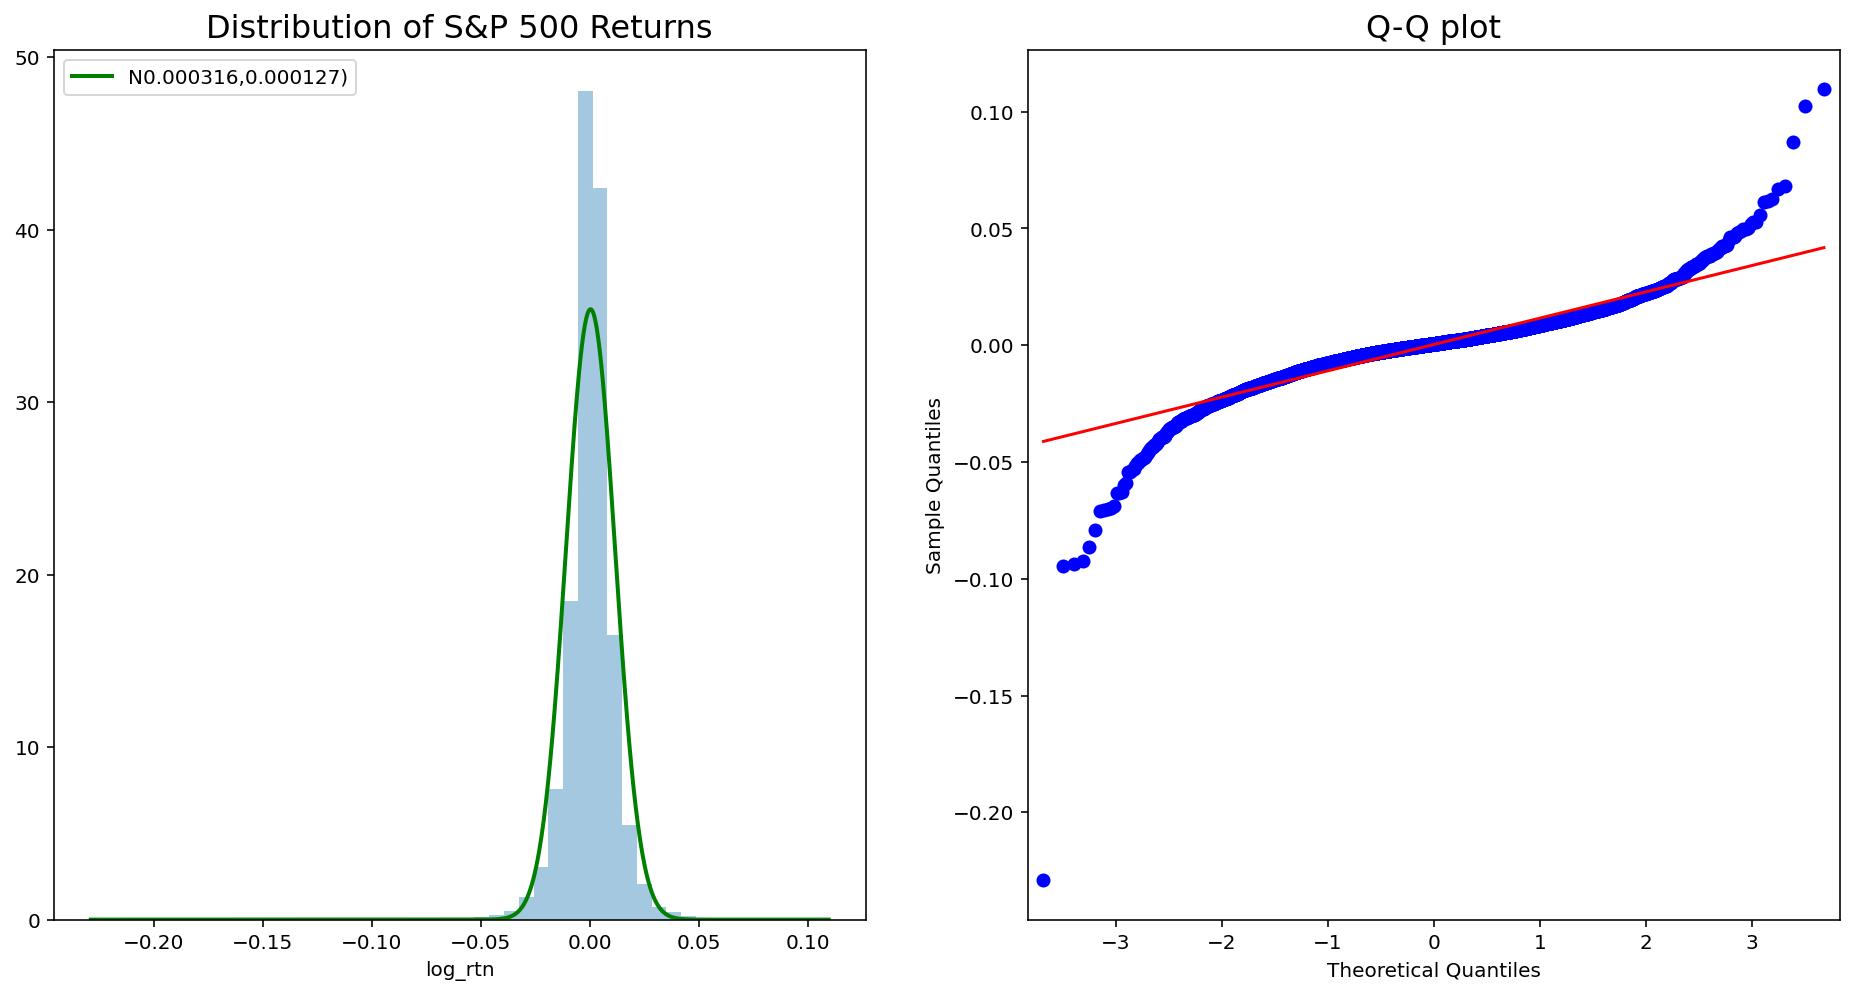

In [45]:
fog, ax = plt.subplots(1, 2, figsize=(16, 8))

# Histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of S&P 500 Returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
          label=f'N{mu:2f},{sigma**2:4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)

# plt.tight_layout()
plt.show()


3. Print the summary statistics of the log returns

In [46]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------Descriptive Statistics----------')
print('Range of dates:', min(df.index.date),'-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}')
print(f'Jarque-Bera Statistics: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------Descriptive Statistics----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera Statistics: 282134.38 with p-value: 0.00


By looking at the mean, stnadard deviation, skewness and kurtosis, we can infer that they deviate from what we would expect under  the normality.Additionally, Jarque-Bera give us reason to reject the null hypothesis stating that the distribution is normal at 99% confidence level.

Negative skewness (third moment): Large negative returns occur more frequently than large positive ones.

Excess kurtosis (fourth moment): Large (and small) returns occur more often than expected.

Parts of investigating this fact:
    1) Histogram of returns
    2) Q-Q plot
    3) Descriptive statistics

Fact 2 - Volatility Clustering

1. Run the following code to visualize the log returns series

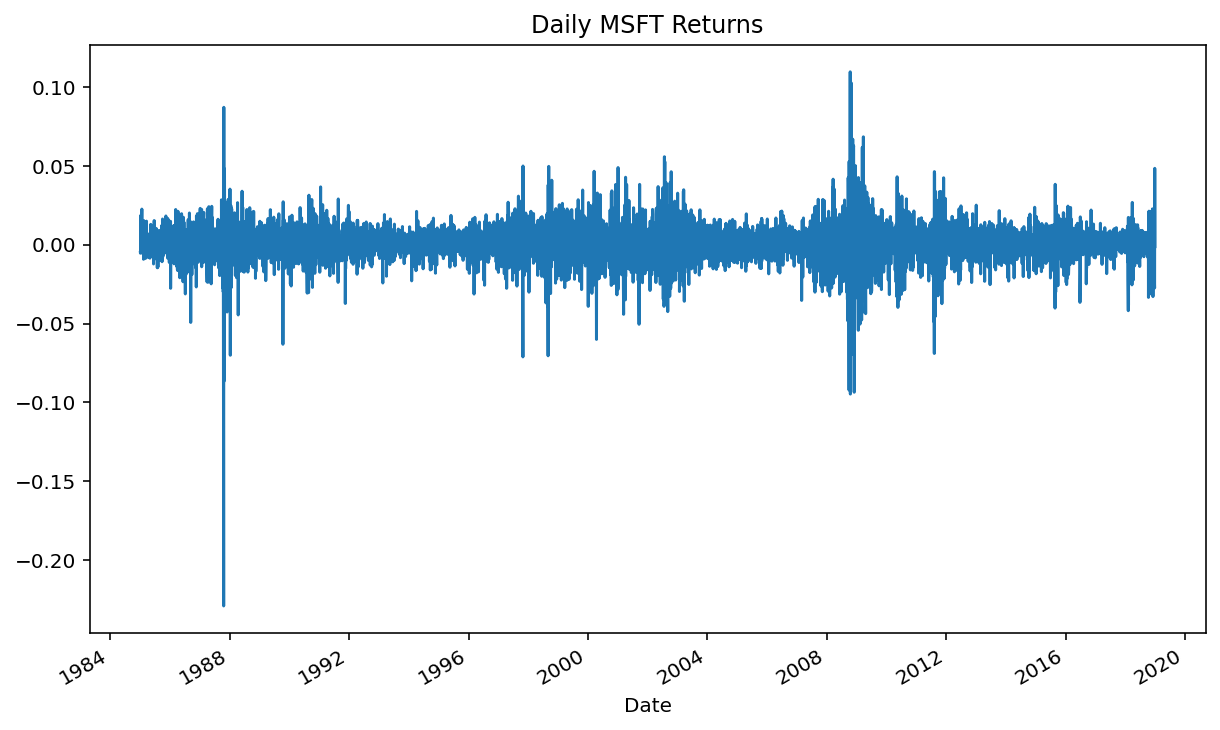

In [47]:
df.log_rtn.plot(title='Daily MSFT Returns', figsize=(10, 6))

# plt.tight_layout()
plt.show()

We can observe clear clusters of volatility periods of higher, positive and negative returns.

Fact 3- Absence of autocorrelation in returns

1. Define the parameters for creating the autocorrelation plots

We will using plot method from statmodels library. We inspect 50 lags and use default 0.05 which also means 95% confidence interval. Values outside the this inverval can be considered statistically significance.

In [48]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

2. Run the following code to create ACF plot of log returns

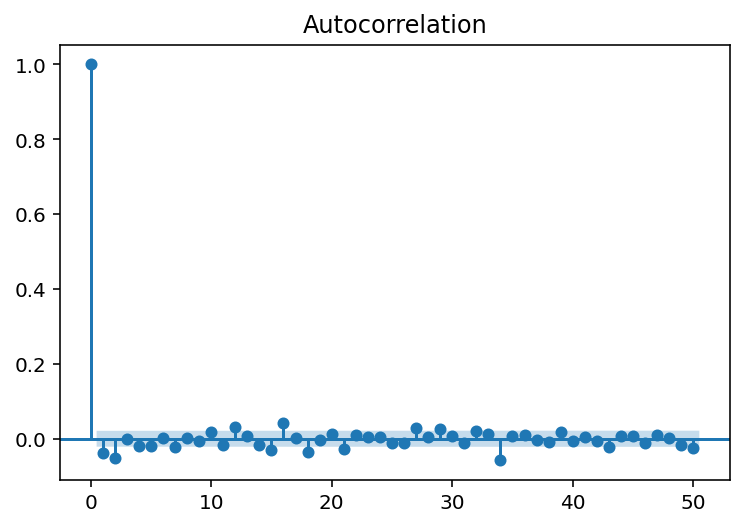

In [49]:
acf = smt.graphics.plot_acf(df.log_rtn,
                           lags=N_LAGS,
                           alpha=SIGNIFICANCE_LEVEL)

#plt.tight_layout()
plt.show()

From the graph, we can assume that there are no correlation in the log returns series.

Fact 4 - Small and decreasing autocorrelation in squared/absolute returns

To verify this fact, we will use plot method from statmodels library. However, this time we applied it to the squared and absolute returns.

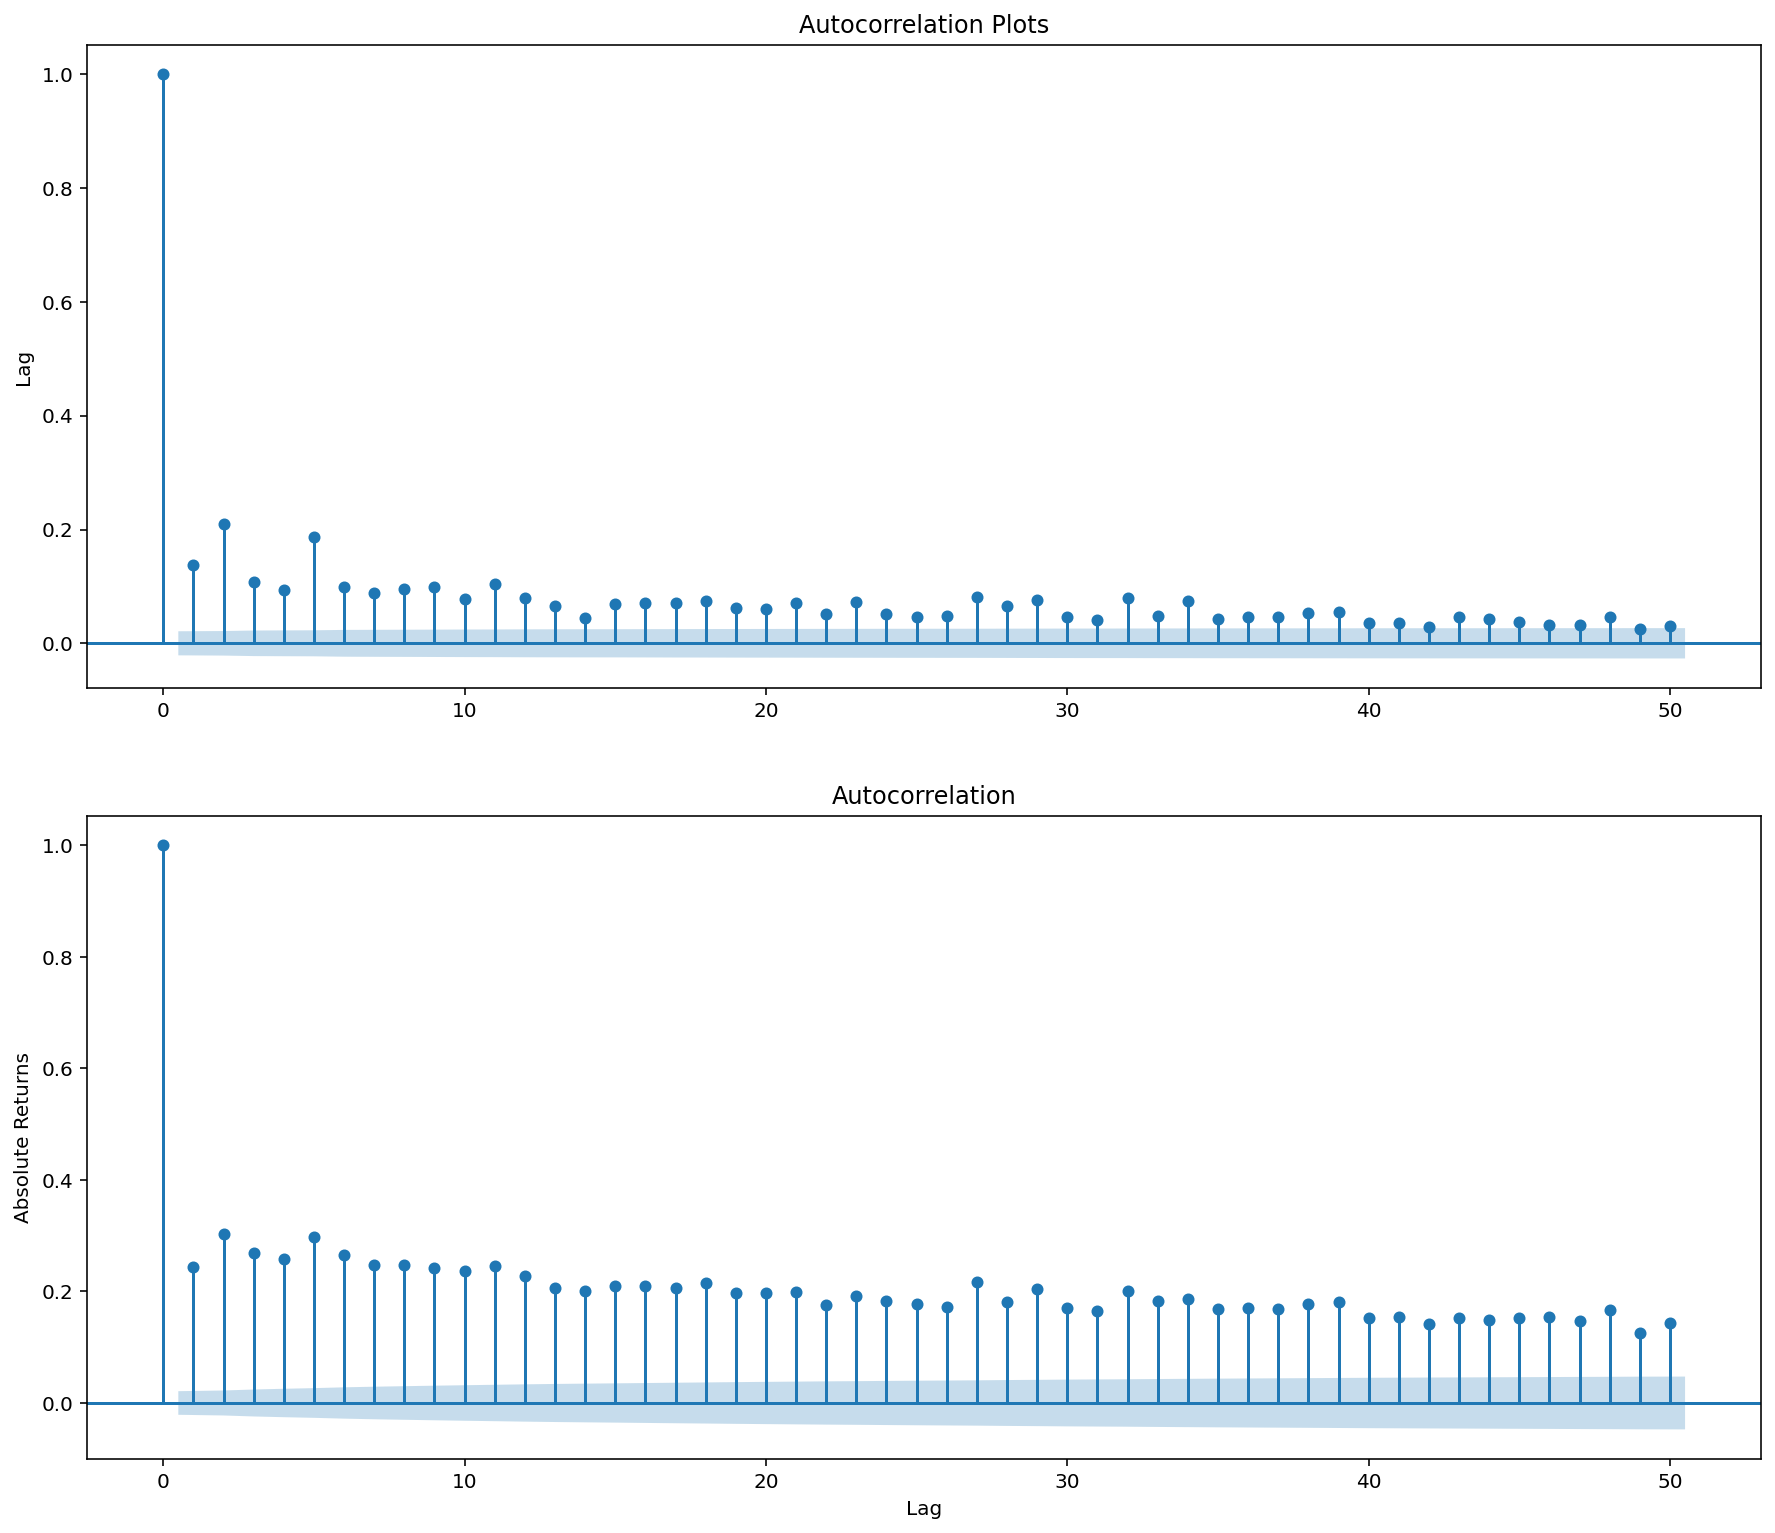

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(15,13))

smt.graphics.plot_acf(df.log_rtn**2, lags=N_LAGS,
                     alpha=SIGNIFICANCE_LEVEL, ax=ax[0])
ax[0].set(title='Autocorrelation Plots',
         ylabel='Lag')
smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS,
                     alpha=SIGNIFICANCE_LEVEL, ax=ax[1])
ax[1].set(ylabel='Absolute Returns',
         xlabel='Lag')

#plt.tight_layout()
plt.show()

Fact 5 -  Leverage effect

1. Calculate volatility measures as moving standard deviations

To investigate it, we use the moving standard deviation calculated using the rolling method of the pandas data frame as a measure of historical volatility. We use the windows 21 and 252 days which correspond to one month and one year of trading date.

In [52]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

2. Plot all the series

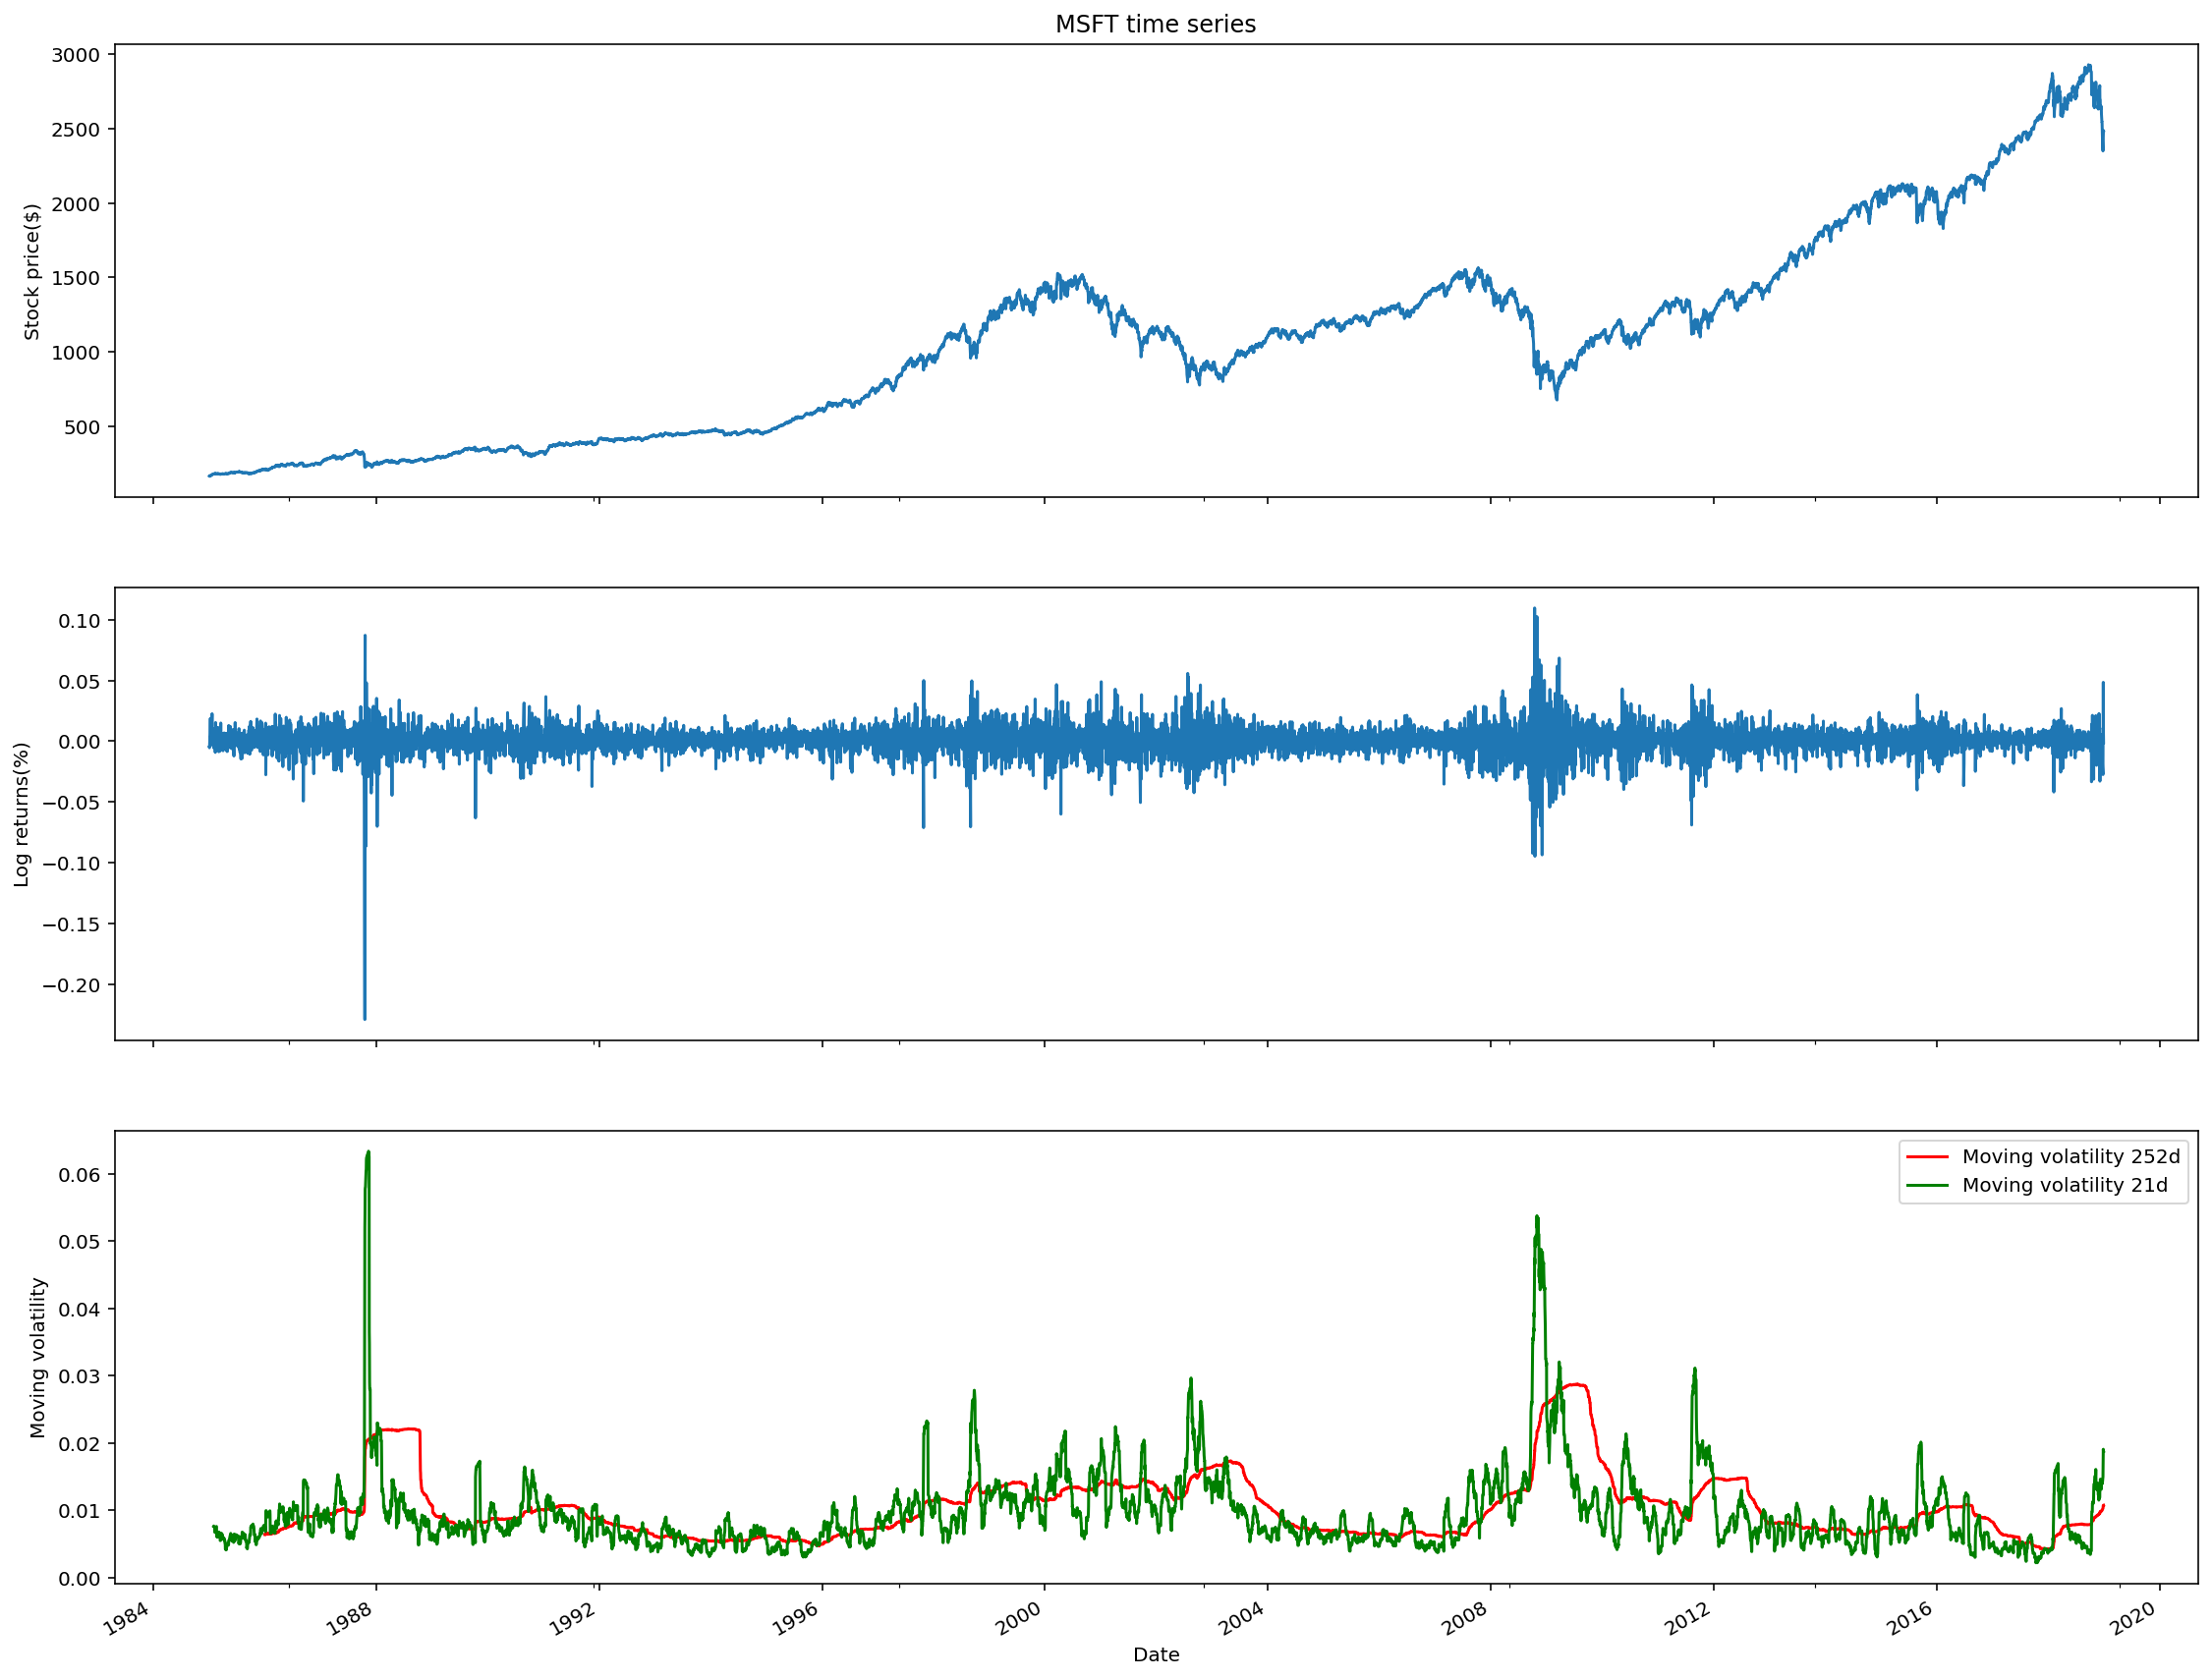

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(19,16),
                       sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',
         ylabel='Stock price($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns(%)')

df.moving_std_252.plot(ax=ax[2], color='r',
                      label='Moving volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g',
                      label='Moving volatility 21d')
ax[2].set(ylabel='Moving volatility',
         xlabel='Date')
ax[2].legend()

#plt.tight_layout()
plt.show()

The graphs show that most measures of an asset volatility or negatively correlation with these returns and we can indeed observe a pattern of increased volatility when the prices go down and decreased in volatility when the prices rising.

More method, we will use VIX (CBOE Volatility Index) which is a popular metrics of the stock market expectation regarding volatility.

1. Download and preprocess the prices of S&P 500 and VIX

In [59]:
df = yf.download(['^GSPC', '^VIX'],
                start='1985-01-01',
                end='2018-12-31',
                progress=False)
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC':'sp500', '^VIX':'vix'})

2. Calculate the log returns

In [60]:
df['log_rtn'] = np.log(df.sp500/df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix/df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

3. Plot a scatterplot with the returns on the axes and fit a regression line to identify trend

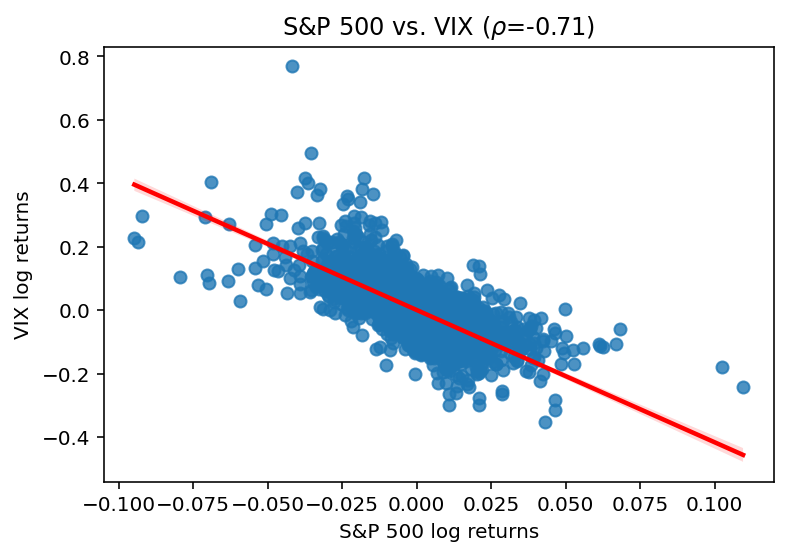

In [62]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df,
                line_kws={'color':'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$={corr_coeff:.2f})',
      ylabel='VIX log returns',
      xlabel='S&P 500 log returns')

#plt.tight_layout()
plt.show()

We can see that both the negative slope of the regression line and a strong negative correlation between the two series confirm the existence of the leverage effect in the return series.